<a href="https://colab.research.google.com/github/AkhilaGHub/XAI-in-Oral-Cancer-Prediction/blob/main/Oral_Cancer_Prediction(Histopathological_Images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cancer='/content/drive/MyDrive/archive/OralCancer/cancer'
non_cancer='/content/drive/MyDrive/archive/OralCancer/non-cancer'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - accuracy: 0.6951 - loss: 0.9207 - val_accuracy: 0.3200 - val_loss: 0.7339
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5000 - loss: 0.7524

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5000 - loss: 0.7524 - val_accuracy: 0.3200 - val_loss: 0.7287
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5215 - loss: 0.6853 - val_accuracy: 0.6800 - val_loss: 0.5900
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.6562 - loss: 0.6411 - val_accuracy: 0.6800 - val_loss: 0.5879
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6287 - loss: 0.6514 - val_accuracy: 0.6800 - val_loss: 0.5939
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - accuracy: 0.6562 - loss: 0.6141 - val_accuracy: 0.6800 - val_loss: 0.5844
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6341 - loss: 0.6269 - val_accuracy: 0.6800 - val_loss: 0.5953
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.9000 - loss: 0.4781 - val_accuracy: 0.6800 - val_loss: 0.5692
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6224 - loss: 0.6110 - val_accuracy: 0.6800 - val_loss: 0.5913
Epoch 10/10
3/3 ━

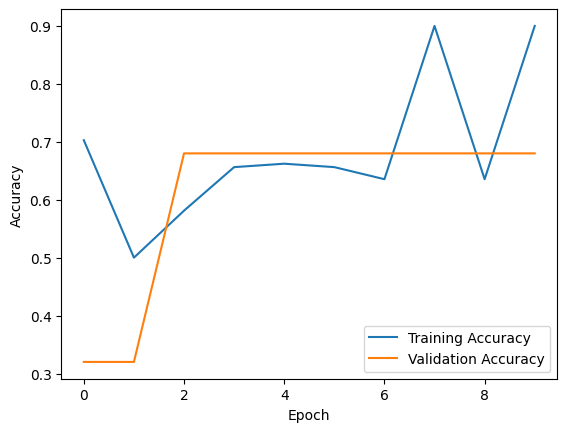

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (150, 150)  # Size to which images will be resized
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 80-20 train-validation split

train_generator = train_datagen.flow_from_directory(
    cancer_path,  # Main directory containing cancer and non-cancer folders
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Plotting Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Saving the Model
model.save('oral_cancer_detection_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and recompile the saved model
model = tf.keras.models.load_model('oral_cancer_detection_model.h5')
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    prediction_result = int(predictions[0][0] > 0.5)
    class_names = ['Non-Cancer', 'Cancer']

    print("Prediction:", class_names[prediction_result])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Prediction: Non-Cancer


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6800 - loss: 0.5748
Validation Accuracy: 68.00%


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 50
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6686 - loss: 0.5405 - val_accuracy: 0.6800 - val_loss: 0.6233
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7812 - loss: 0.5647

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - accuracy: 0.7812 - loss: 0.5647 - val_accuracy: 0.6800 - val_loss: 0.6094
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7203 - loss: 0.5050 - val_accuracy: 0.6800 - val_loss: 0.6878
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.5625 - loss: 0.6468 - val_accuracy: 0.6800 - val_loss: 0.6168
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6410 - loss: 0.5595 - val_accuracy: 0.6000 - val_loss: 0.6803
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.7812 - loss: 0.5589 - val_accuracy: 0.8800 - val_loss: 0.6465
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8379 - loss: 0.4549 - val_accuracy: 0.6800 - val_loss: 0.8076
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.5938 - loss: 0.7000 - val_accuracy: 0.6800 - val_loss: 0.6922
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8184 - loss: 0.3996 - val_accuracy: 0.7600 - val_loss: 0.6868
Epoch 10/50
3/3

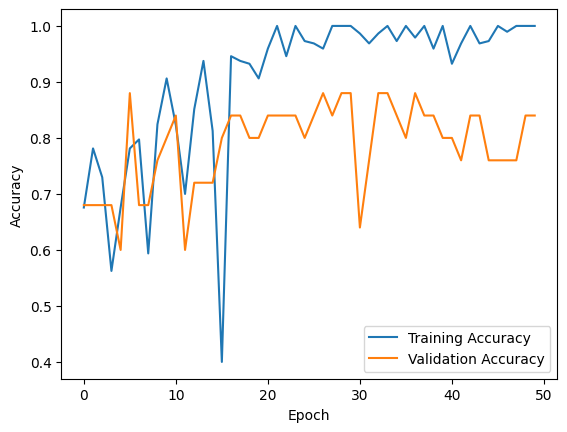

In [ ]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Plotting Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Saving the Model
model.save('oral_cancer_detection_model.h5')

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8400 - loss: 1.3369
Validation Accuracy: 84.00%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    class_names = ['Non-Cancer', 'Cancer']
    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])


predict_image('/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg')


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 115200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model with Flatten adjustment
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Flatten the output from the Conv layers to feed into Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate Model Accuracy
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.5298 - loss: 1.6159 - val_accuracy: 0.6800 - val_loss: 0.6710
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 750ms/step - accuracy: 0.4688 - loss: 0.7424 - val_accuracy: 0.6800 - val_loss: 0.6028
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5951 - loss: 0.6384 - val_accuracy: 0.6800 - val_loss: 0.5942
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 808ms/step - accuracy: 0.7000 - loss: 0.5933 - val_accuracy: 0.6800 - val_loss: 0.5933
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6631 - loss: 0.6239 - val_accuracy: 0.6800 - val_loss: 0.6169
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6562 - loss: 0.5721 - val_accuracy: 0.6800 - val_loss: 0.6091
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6631 - loss: 0.5728 - val_accuracy: 0.6800 - val_loss: 0.6138
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7188 - loss: 0.5055 - val_accuracy: 0.7600 - val_loss: 0.6310
Epoch 9/10
3/3 ━━

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/non-cancer/20200314_1129242.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: Non-Cancer


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
# Path to cancer and non-cancer images
cancer_path = '/content/drive/MyDrive/oral'

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.0001
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)
# Load VGG16 with pre-trained ImageNet weights, without the top classification layer
base_model = VGG16(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Building the model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),  # Add a dense layer to learn specific features
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 4133 images belonging to 3 classes.
Found 1033 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 4575s 35s/step - accuracy: 0.9618 - loss: -0.5129 - val_accuracy: 0.9668 - val_loss: -1.7726
Epoch 2/50
  1/129 ━━━━━━━━━━━━━━━━━━━━ 59:30 28s/step - accuracy: 1.0000 - loss: 2.6588e-37

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 1.0000 - loss: 2.6588e-37 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 4563s 35s/step - accuracy: 0.9642 - loss: -1.9597 - val_accuracy: 0.9668 - val_loss: -3.8096
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 4525s 35s/step - accuracy: 0.9635 - loss: -4.1948 - val_accuracy: 0.9668 - val_loss: -6.3091
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 383ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.9656 - loss: -6.2571 

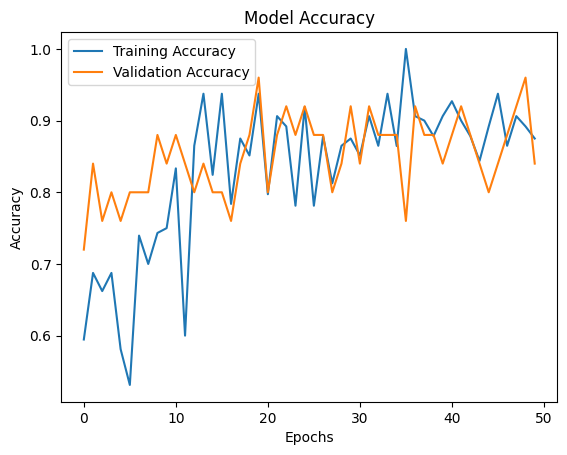

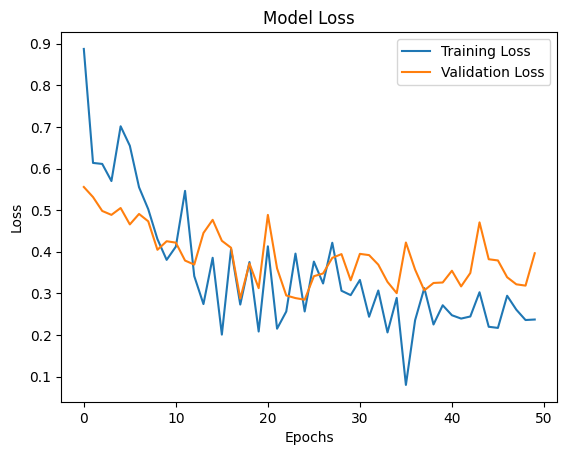

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/3.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Prediction: Non-Cancer


In [ ]:
predict_image('/content/2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Cancer


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for this image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted class)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization, we will normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to match model's training condition
    return img_array

def display_gradcam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize the heatmap
    jet = plt.cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    # Display Grad-CAM
    plt.figure(figsize=(10, 10))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
IMAGE_SIZE = (256, 256)
last_conv_layer_name = "dense_5"  # Update this to reference VGG16 layer within the full model

# Load and preprocess the image
def preprocess_image(img_path, target_size):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Generate Grad-CAM heatmap
def get_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Calculate gradient of top predicted class with respect to the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_channel = predictions[:, 0]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Create heatmap by multiplying each channel by "how important this channel is" and then summing
    conv_outputs = conv_outputs[0]
    heatmap = np.zeros(conv_outputs.shape[:2], dtype=np.float32)

    for i in range(pooled_grads.shape[0]):
        heatmap += pooled_grads[i] * conv_outputs[:, :, i]

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Overlay the heatmap on the image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMAGE_SIZE)

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title("Grad-CAM Heatmap")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Overlay Image")
    plt.axis("off")
    plt.show()

# Path to the image you want to visualize
img_path = '/content/drive/MyDrive/oral/test/OSCC/OSCC_100x_101.jpg'

# Generate and display Grad-CAM
img_array = preprocess_image(img_path, target_size=IMAGE_SIZE)
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)
display_gradcam(img_path, heatmap)


NameError: name 'model' is not defined

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8fe325bcc8e4c8b0dde11ba58c6093fb4dc78ae63e134e6ff20c2c616fc1072c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
model = load_model('oral_cancer_detection_model.h5')  # Replace with your model path


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'oral_cancer_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)